## State-wise analysis

StateAbbr
WV    11.104167
OH     9.474732
KY     9.137594
MI     8.901587
IN     8.719963
AL     8.501961
TN     8.318547
FL     8.203380
DE     8.111538
LA     8.103937
MO     8.066140
OK     7.921987
MS     7.572152
PA     7.447752
MD     7.438806
AR     7.176563
NH     7.147059
NV     7.123306
RI     7.102830
GA     7.074249
NJ     6.876087
VA     6.639731
IL     6.551552
IA     6.431188
KS     6.398710
CT     6.341525
MA     6.323922
US     6.250000
NC     6.238510
WY     6.105556
AZ     6.016699
SC     5.938418
NY     5.927218
ME     5.859091
MT     5.761702
WI     5.606039
WA     5.537853
TX     5.428347
NE     5.391284
DC     5.364444
NM     5.323364
OR     5.136932
ID     5.064384
VT     5.000000
CA     4.984109
SD     4.828333
CO     4.752247
ND     4.692593
AK     4.538596
MN     4.379630
UT     4.264143
HI     3.714407
Name: Data_Value, dtype: float64


/tmp/ipykernel_6168/2751218124.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_copd.index, y=statewise_copd.values, palette='viridis')


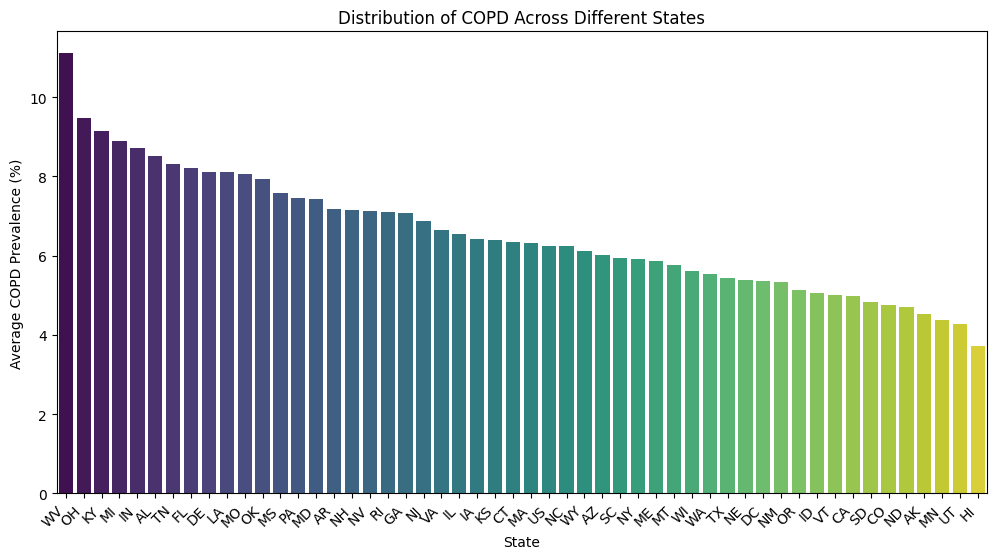

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with the correct file path
file_path = '../data/COPD.csv'
copd_data = pd.read_csv(file_path)

# State-wise analysis
statewise_copd = copd_data.groupby('StateAbbr')['Data_Value'].mean().sort_values(ascending=False)

# Print statewise_copd for debugging
print(statewise_copd)

# Plot the distribution by state with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.barplot(x=statewise_copd.index, y=statewise_copd.values, palette='viridis')
plt.title('Distribution of COPD Across Different States')
plt.xlabel('State')
plt.ylabel('Average COPD Prevalence (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


/tmp/ipykernel_6168/1891087896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_15_states.values, y=top_15_states.index, palette='viridis')


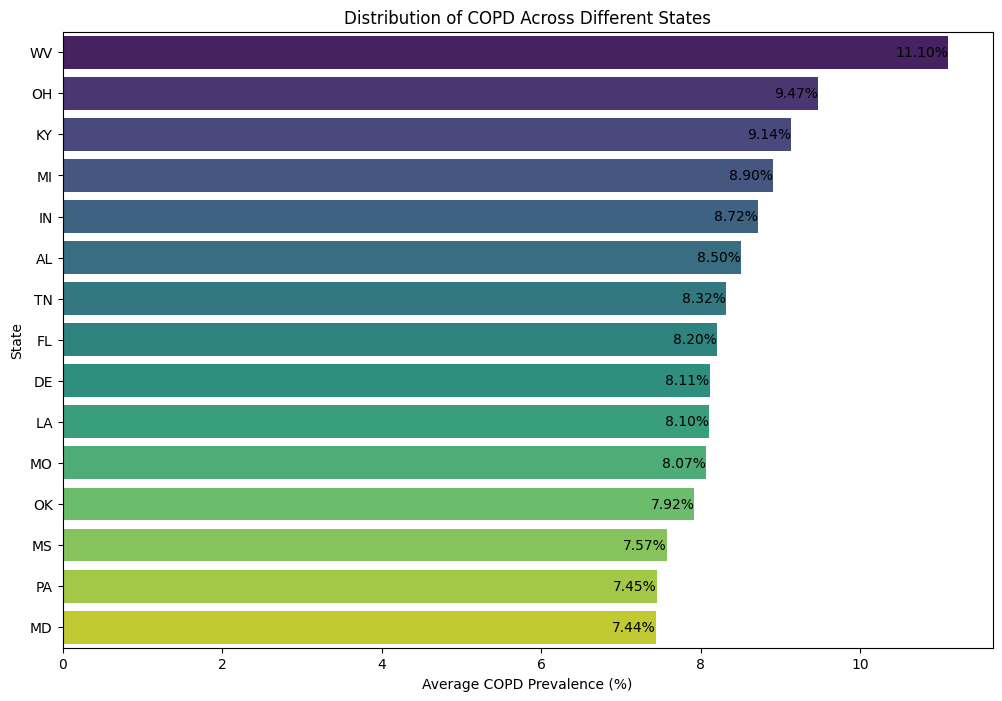

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
copd_data = pd.read_csv(file_path)

# State-wise analysis
statewise_copd = copd_data.groupby('StateAbbr')['Data_Value'].mean().sort_values(ascending=False)

# Select the top 15 states
top_15_states = statewise_copd.head(15)

# Plot the distribution by state with a horizontal bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_15_states.values, y=top_15_states.index, palette='viridis')
plt.title('Distribution of COPD Across Different States')
plt.xlabel('Average COPD Prevalence (%)')
plt.ylabel('State')

# Annotate percentages on the bars
for i, value in enumerate(top_15_states.values):
    barplot.text(value, i, f'{value:.2f}%', va='center', fontsize=10, color='black', ha='right')

plt.show()


## City-wise analysis

/tmp/ipykernel_6168/607057411.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=citywise_copd.index, y=citywise_copd.values, palette='viridis')


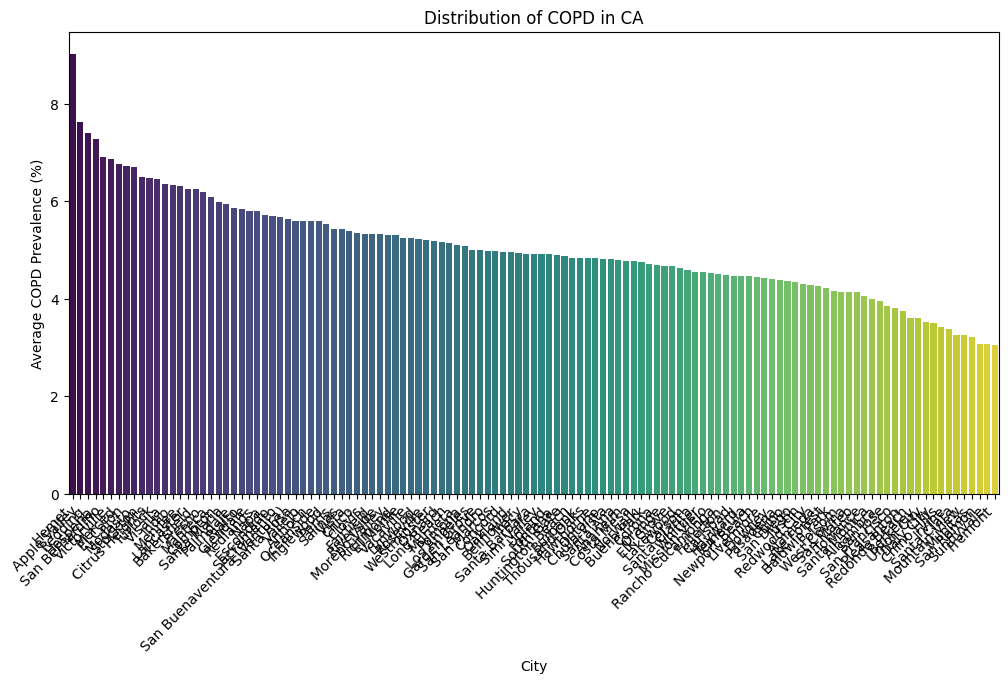

In [6]:
# City-wise analysis for a specific state (e.g., California)
selected_state = 'CA'
citywise_copd = copd_data[copd_data['StateAbbr'] == selected_state].groupby('CityName')['Data_Value'].mean().sort_values(ascending=False)

# Plot the distribution by city within the selected state
plt.figure(figsize=(12, 6))
sns.barplot(x=citywise_copd.index, y=citywise_copd.values, palette='viridis')
plt.title(f'Distribution of COPD in {selected_state}')
plt.xlabel('City')
plt.ylabel('Average COPD Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_6168/3591171112.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_n_cities_states['Data_Value'], y=top_n_cities_states['CityState'], palette='viridis')


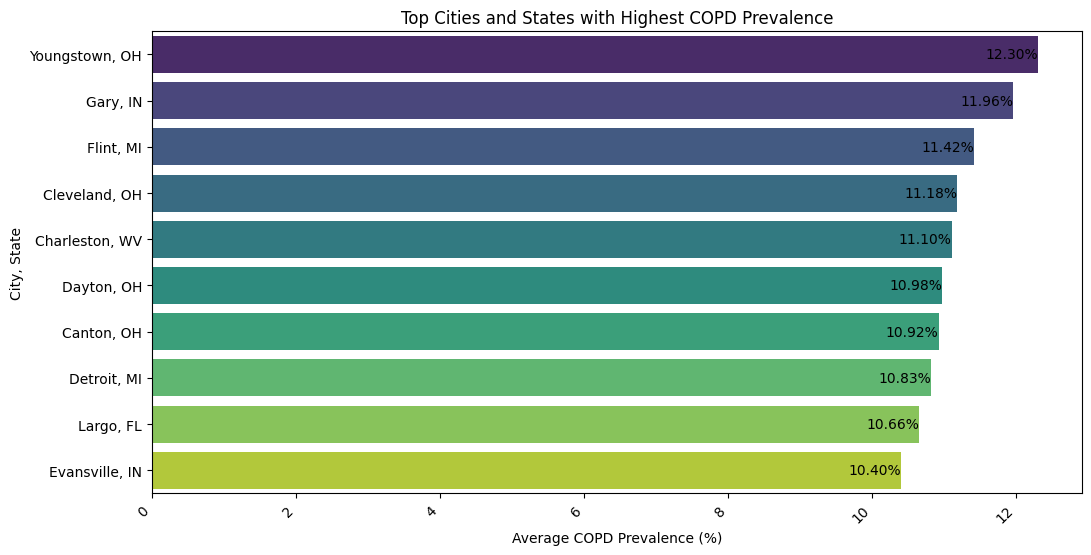

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with the correct file path
file_path = '/workspaces/uds-2024-flyingsloths/data/COPD.csv'
copd_data = pd.read_csv(file_path)

# City-wise analysis for all states
citywise_copd = copd_data.groupby(['StateAbbr', 'CityName'])['Data_Value'].mean().sort_values(ascending=False)

# Select the top N cities and states (e.g., top 10)
top_n_cities_states = citywise_copd.head(10)

# Convert the Series to a DataFrame and reset the index
top_n_cities_states = top_n_cities_states.reset_index()

# Create a new column combining city and state information
top_n_cities_states['CityState'] = top_n_cities_states['CityName'] + ', ' + top_n_cities_states['StateAbbr']

# Plot the distribution by city and state
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_n_cities_states['Data_Value'], y=top_n_cities_states['CityState'], palette='viridis')
plt.title('Top Cities and States with Highest COPD Prevalence')
plt.xlabel('Average COPD Prevalence (%)')
plt.ylabel('City, State')

# Annotate percentages on the bars
for i, value in enumerate(top_n_cities_states['Data_Value']):
    barplot.text(value, i, f'{value:.2f}%', va='center', fontsize=10, color='black', ha='right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()
